<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Lecture 3 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 2 February 2022, with material from Peter Norvig, Chris Fonnesbeck, and Ned Batchelder</div>

## Introduction to the NumPy library

`NumPy` is our performance and math library. It's a C-module, so it gets compiled to machine code and is blazing fast. It's the **engine** that makes the Python snail fast!

<br />
<center>
    <img src="ipynb.images/RocketSnail.png" width=400 />
</center>

Let's quickly review some Python data structures.

### Review: Python Sets

In [59]:
s = set()
s.add(1)
s.add(2)
s.add(1)
s

{1, 2}

In [61]:
!pwd

C:\Users\Dino


In [62]:
file = open("data/http_log.txt", "r")
lines = file.readlines()
file.close()

ip_addresses = set(map(lambda x: x.split('-')[0], lines))
print(ip_addresses)

{'222.187.221.201 ', '71.192.48.105 ', '207.77.135.68 ', '92.240.68.153 ', '212.235.5.188 ', '209.19.15.94 ', '59.93.51.231 ', '71.233.70.47 ', '198.169.189.226 ', '208.80.194.56 ', '129.83.31.1 ', '122.50.137.176 ', '66.170.227.42 ', '203.129.204.49 ', '195.242.98.161 ', '91.121.107.137 ', '207.68.114.15 ', '216.86.52.162 ', '66.249.67.117 ', '59.103.26.145 ', '208.80.194.37 ', '59.93.92.14 ', '222.187.221.88 ', '198.64.129.244 ', '125.16.5.109 ', '203.145.185.162 ', '65.112.145.106 ', '24.61.156.42 ', '94.76.204.194 ', '65.97.0.67 ', '203.129.204.131 ', '208.80.194.48 ', '67.9.177.233 ', '71.59.196.132 ', '158.73.247.16 ', '98.206.247.229 ', '91.121.134.62 ', '98.246.45.87 ', '129.83.31.2 ', '59.96.109.33 ', '64.185.117.181 ', '116.71.47.122 ', '72.245.200.114 ', '68.109.227.198 ', '115.186.128.19 ', '75.145.151.221 ', '192.168.2.13 ', '192.107.147.2 ', '127.0.0.1 ', '116.71.50.81 ', '124.247.222.206 ', '216.204.33.226 ', '198.169.188.225 ', '202.59.80.153 ', '222.187.220.162 ', '203

Most important list manipulation functions are *map*, *reduce*, and *filter*

### Review: Python List Comprehensions

List comprehensions are transformations of lists

In [63]:
even_numbers = (x for x in range(100) if x % 2 == 0)
even_numbers

<generator object <genexpr> at 0x0000024A6284CD58>

In [69]:
even_numbers = (x for x in range(100) if x % 2 == 0)
zeroes = [0 for _ in range(100)]
#pairs = [(x,y) for x in range(100) for y in range(100)] #zip(even_numbers, zeroes)
#print(pairs)
print(list(zip(even_numbers, zeroes, (x for x in range(100)))))

[(0, 0, 0), (2, 0, 1), (4, 0, 2), (6, 0, 3), (8, 0, 4), (10, 0, 5), (12, 0, 6), (14, 0, 7), (16, 0, 8), (18, 0, 9), (20, 0, 10), (22, 0, 11), (24, 0, 12), (26, 0, 13), (28, 0, 14), (30, 0, 15), (32, 0, 16), (34, 0, 17), (36, 0, 18), (38, 0, 19), (40, 0, 20), (42, 0, 21), (44, 0, 22), (46, 0, 23), (48, 0, 24), (50, 0, 25), (52, 0, 26), (54, 0, 27), (56, 0, 28), (58, 0, 29), (60, 0, 30), (62, 0, 31), (64, 0, 32), (66, 0, 33), (68, 0, 34), (70, 0, 35), (72, 0, 36), (74, 0, 37), (76, 0, 38), (78, 0, 39), (80, 0, 40), (82, 0, 41), (84, 0, 42), (86, 0, 43), (88, 0, 44), (90, 0, 45), (92, 0, 46), (94, 0, 47), (96, 0, 48), (98, 0, 49)]


In [7]:
even_numbers = (x for x in range(100) if x % 2 == 0)

In [8]:
print(list(even_numbers))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


In [10]:
values = [1,2,3,4,5,6,7,8,9]
even = list(filter(lambda x: x % 2 ==0, values))
even

[2, 4, 6, 8]

In [11]:
from functools import reduce
summed = reduce(lambda a,b: a + b, values)
summed

45

In [37]:
add_10 = [x + 10 for x in values]
add_10

[11, 12, 13, 14, 15, 16, 17, 18, 19]

### Review: Enumerations and Generators

In [ ]:
# generator
def my_lazy_range(n):
    i = 0
    while i < n:
        yield i
        i += 1
        
for i in my_lazy_range(10):
    print(i)
    
# enumeration
a = range(100)
print(a)

In [38]:
l = [1, 2, "foo", "bar"]
l

[1, 2, 'foo', 'bar']

# 1. Practical Introduction to NumPy

Ok, let's officially introduce [NumPy](https://en.wikipedia.org/wiki/NumPy). We can hardly do data science without it.

Numpy adds Python support for large multi-dimensional arrays and matrices, along with a library of high-level mathematical functions to operate on these arrays. Numpy is the first and lowest level data science extension for Python. It focuses on number calculations, reads in fixed datatypes, improves RAM efficiency, and teaches you to think in **Vectors**, **Matrices**, and **Tensors**.

## Array Attributes

First let's discuss some useful array attributes.
We'll start by defining three random arrays, a one-dimensional, two-dimensional, and three-dimensional array.
We'll use NumPy's random number generator, which we will *seed* with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [1]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [71]:
x1

array([5, 0, 3, 3, 7, 9])

In [72]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [73]:
x3

array([[[8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4]]])

Each array has attributes ``ndim`` (the number of dimensions), ``shape`` (the size of each dimension), and ``size`` (the total size of the array):

In [8]:
print("x3 ndim: ", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60


If you are comfortable with Python's standard list indexing with `[]`, indexing in NumPy is the same, plus more.
In a one-dimensional array, the $i^{th}$ value (counting from zero) can be accessed by specifying the desired index in square brackets, just as with Python lists:

In [9]:
x1

array([5, 0, 3, 3, 7, 9])

In [10]:
x1[0]

5

In multi-dimensional arrays, items can be accessed using either standard python indexing (`[][]`), or with a comma-separated tuple of indices: `[ , ]` like in R!

In [11]:
x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [12]:
x2[0][0]

3

In [13]:
x2[0, 0]

3

In [14]:
x3[0][0][0]

8

In [15]:
x3[0,0,0]

8

Values can also be modified using any of the above index notation:

In [16]:
x2[0, 0] = 12
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

## One-dimensional subarrays

In [78]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
.4

0.4

In [76]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [19]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [80]:
x[4:7:2]  # middle sub-array

array([4, 6])

In [82]:
x[::2]  # every other element

array([0, 2, 4, 6, 8])

### Multi-dimensional subarrays (matrices, tensors)

Multi-dimensional slices work in the same way, with multiple slices separated by commas.
For example:

In [24]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [25]:
x2[:2, :3]  # two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [26]:
x2[:3, ::2]  # all rows, every other column

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

## Reshaping of Arrays

Another ***amazingly*** useful type of operation is **reshaping of arrays**.

The most flexible way of doing this is with the ``reshape`` method.
For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [87]:
np.arange(1, 28).reshape((3, 3, 3))

array([[[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]]])

This is a 4-dimensional *beast*:

In [89]:
import numpy as np
grid = np.arange(1, 10).reshape((3, 3, 1, 1))
print(grid)

[[[[1]]

  [[2]]

  [[3]]]


 [[[4]]

  [[5]]

  [[6]]]


 [[[7]]

  [[8]]

  [[9]]]]


It's really just a 2D structure though. *embedded* in a 4D space. You can *squeeze* that structure out of its 4D space with the `squeeze` operator:

In [90]:
np.squeeze(grid)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Where possible, the ``reshape`` method will use a no-copy view of the initial array, but with non-contiguous memory buffers this is not always the case.

A common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix. Let's do it *again*: This is a **vector** (single row) expressed as a **matrix**:

In [ ]:
x = np.array([1, 2, 3])

# row vector to a matrix via reshape
m = x.reshape((1, 3))
m

Here we reshape to an even higher dimension. This is a **vector** (single row) expressed as a **tensor** (3D matrix) 

In [ ]:
# reshape to a tensor!
t = x.reshape((3, 1, 1))
t

How do we undo this *unfolding*? With NumPy's `squeeze()` API:

In [ ]:
np.squeeze(m, axis=0)

In [ ]:
np.squeeze(m)

In [ ]:
np.squeeze(t, axis=1)

In [ ]:
np.squeeze(np.squeeze(t, axis=1), axis=1)

In [ ]:
np.squeeze(np.squeeze(t))

In [92]:
grid = np.arange(1, 626).reshape((1, 5, 5, 5, 5))
grid

array([[[[[  1,   2,   3,   4,   5],
          [  6,   7,   8,   9,  10],
          [ 11,  12,  13,  14,  15],
          [ 16,  17,  18,  19,  20],
          [ 21,  22,  23,  24,  25]],

         [[ 26,  27,  28,  29,  30],
          [ 31,  32,  33,  34,  35],
          [ 36,  37,  38,  39,  40],
          [ 41,  42,  43,  44,  45],
          [ 46,  47,  48,  49,  50]],

         [[ 51,  52,  53,  54,  55],
          [ 56,  57,  58,  59,  60],
          [ 61,  62,  63,  64,  65],
          [ 66,  67,  68,  69,  70],
          [ 71,  72,  73,  74,  75]],

         [[ 76,  77,  78,  79,  80],
          [ 81,  82,  83,  84,  85],
          [ 86,  87,  88,  89,  90],
          [ 91,  92,  93,  94,  95],
          [ 96,  97,  98,  99, 100]],

         [[101, 102, 103, 104, 105],
          [106, 107, 108, 109, 110],
          [111, 112, 113, 114, 115],
          [116, 117, 118, 119, 120],
          [121, 122, 123, 124, 125]]],


        [[[126, 127, 128, 129, 130],
          [131, 132, 133, 

Any time you see a `1` in the number of elements of one of the dimensions, it means that we are doing an embedding of a lower-dimensional object into a higher-dimensional space. Like, imagine taking a flat human and putting that flat human into 3D space. If you look at him on his side and look at the resulting shape, there will only be a single coordinate for any point describing that shape, and you can't really see a single point, so the flat human becomes invisible!

## Array Concatenation and Splitting

All of the preceding routines worked on single arrays. It's also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays.

### Concatenation of arrays

**Concatenation**, or joining of two arrays in NumPy, is primarily accomplished using the routines ``np.concatenate``, ``np.vstack``, and ``np.hstack``.
``np.concatenate`` takes a tuple or list of arrays as its first argument, as we can see here:

In [93]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

It can also be used for two-dimensional arrays:

In [94]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [98]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [97]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

### Splitting of arrays

The opposite of concatenation is **splitting**, which is implemented by the functions ``np.split``, ``np.hsplit``, and ``np.vsplit``.  For each of these, we can pass a list of indices giving the split points:

In [99]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


## Finding maximum element

The `numpy.argmax(a, axis=None, out=None)` function returns the indices of the
maximum values along an axis.
In a 2d array, we can easily obtain the index of the maximum value as follows:

In [100]:
array = (
        np.array([[1,2,3],
                  [4,5,6]])
)
array

array([[1, 2, 3],
       [4, 5, 6]])

In [101]:
# numpy array
array = np.array([[1,2,3], [4,5,6]])

# index of maximum value
max_pos = np.argmax(array)
max_pos
#5

5

In [43]:
array.reshape(6)[5]

6

The `argmax` operator is used a lot in ML.

We can obtain the indeces of maximum values along a specified axis, providing 0 or 1 to the axis attribute

In [ ]:
# numpy array
array = np.array([[1,2,3],[4,5,6]])

# index of maximum value along axis 0
max_pos_0 = np.argmax(array, axis=0)
print(max_pos_0)
# array([1, 1, 1], dtype=int64)

# index of maximum value along axis 1
max_pos_1 = np.argmax(array, axis=1)
max_pos_1
# array([2, 2], dtype=int64)

## Plotting with matplotlib

Cannot do data science with ***plotting***!

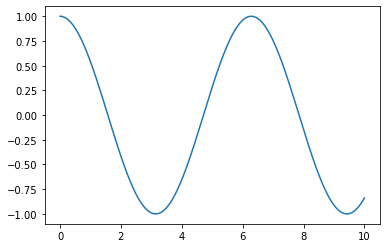

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,10,300)
y = np.cos(x)
myplot = plt.plot(x,y)

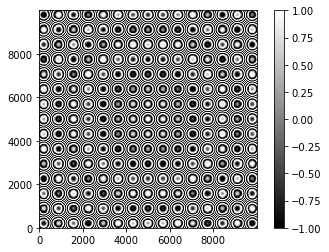

In [107]:
points = np.arange(-50,50,0.01)
x, y = np.meshgrid(points, points)
z = np.cos(x**2 + y**2)
plt.imshow(z, cmap = plt.cm.gray); plt.colorbar()

## Operation profiling

In [89]:
np.array('1,2,3,4')
np.array(np.mat('1,2; 3,4'))

array([[1, 2],
       [3, 4]])

In [109]:
%time for _ in range(1000000): 2 + 2

Wall time: 79.8 ms


In [58]:
%time for _ in range(1000000): a = 2 + 2

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


In [110]:
myarr = np.arange(1000000)
mylist = range(1000000)
%time for _ in range(10): myarr = myarr * 2
%time for _ in range(10): [x * 2 for x in mylist]

Wall time: 31.9 ms
Wall time: 2.03 s


## Random arrays

*Sooooooo* useful!

In [111]:
myarray = np.array([[1,2,3], [4,5,6], [7,8,9]])
myarray

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [120]:
data = np.random.rand(4,4,4)
data

array([[[0.54212945, 0.12091936, 0.68069724, 0.28711926],
        [0.04297641, 0.11609834, 0.10642941, 0.31648792],
        [0.24653479, 0.56278312, 0.90635423, 0.58010691],
        [0.59793673, 0.23804352, 0.58088727, 0.14587015]],

       [[0.33563098, 0.62552797, 0.36130568, 0.91099399],
        [0.87849262, 0.43415558, 0.5176121 , 0.47466799],
        [0.1843626 , 0.43476064, 0.18755194, 0.71520783],
        [0.52300639, 0.32056533, 0.00309954, 0.59730294]],

       [[0.64907833, 0.00518963, 0.9702218 , 0.66386607],
        [0.2931444 , 0.20036432, 0.92570215, 0.30925129],
        [0.40321803, 0.63306201, 0.89065281, 0.43260636],
        [0.92821871, 0.59208066, 0.43178493, 0.59278027]],

       [[0.35450605, 0.65701977, 0.65230895, 0.82171856],
        [0.40276676, 0.03756505, 0.98463162, 0.44814283],
        [0.93763523, 0.67204106, 0.26669688, 0.56406436],
        [0.95693298, 0.11348592, 0.27222936, 0.08205775]]])

## Boolean indexing:

In [ ]:
names = np.array([1, 'foo'])
type(names[0])

In [2]:
names = np.array(['Pratiksha', 'dino', 'Xinlin', "Tianqi", "Pranshu"])
print(names == 'Pratiksha')

[ True False False False False]


In [6]:
data = np.random.rand(5,5)
data

array([[0.971945  , 0.87819347, 0.50962438, 0.05571469, 0.45115921],
       [0.01998767, 0.44171092, 0.97958673, 0.35944446, 0.48089353],
       [0.68866118, 0.88047589, 0.91823547, 0.21682214, 0.56518887],
       [0.86510256, 0.50896896, 0.91672295, 0.92115761, 0.08311249],
       [0.27771856, 0.0093567 , 0.84234208, 0.64717414, 0.84138612]])

In [7]:
data[names == 'Pratiksha']

array([[0.971945  , 0.87819347, 0.50962438, 0.05571469, 0.45115921]])

In [ ]:
arr = np.arange(32).reshape(8,4)
arr

## Beginner Linear Algebra

This is just a quick *appetizer*...

In [53]:
from numpy.linalg import inv
X = np.random.randn(4,4)
X

array([[-0.82346757, -1.27974266,  0.19533102, -0.78674108],
       [-0.78160973,  0.48882429,  1.26346975, -0.87768783],
       [ 0.90414627,  0.41658658, -0.42753484,  0.04922545],
       [ 1.63421412,  0.10978166, -0.04608699, -0.49768921]])

In [54]:
Y = inv(X)
Y

array([[-0.33347784, -0.24371971, -0.96547368,  0.86147068],
       [-0.07112602,  0.56321326,  1.7086672 , -0.71180518],
       [-0.89290342, -0.04399452, -3.00542682,  1.19181561],
       [-1.02801364, -0.67196982, -2.51502202,  0.55206581]])

In [55]:
X @ Y

array([[ 1.00000000e+00, -5.55111512e-17, -8.32667268e-17,
        -5.55111512e-17],
       [-1.11022302e-16,  1.00000000e+00, -4.44089210e-16,
         0.00000000e+00],
       [ 1.38777878e-17,  5.55111512e-17,  1.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

## Introduction to statistics with NumPy

The `numpy.histogram(a, bins=10, range=None, normed=None, weights=None,
density=None)` computes the [histogram](https://en.wikipedia.org/wiki/Histogram) of a set of data. 

The function returns 2 values:
- the frequency count
- the bin edges

>Example
The following data frame contains the height of 5000 men. We create a histogram plot,
passing kind=’hist’ to the plot method.


# Numpy *'Objects'*

In [117]:
class Human(object):
    # A class attribute. It is shared by all instances of this class
    species = "H. sapiens"

    def __init__(self, name):
        # Assign the argument to the instance's name attribute
        self.name = name

        # Initialize property
        self.age = 0
        
    def say(self, msg):
        return "{0}: {1}".format(self.name, msg)

In [116]:
a = Human("Dino")
b = Human("Elon")
c = np.array([a, b])
c

array([<__main__.Human object at 0x0000015A26A38EB8>,
       <__main__.Human object at 0x0000015A26A38CC0>], dtype=object)

# 2. Incredibly useful Numpy APIs
The `numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)` function returns evenly spaced numbers over a specified interval defined by the first two arguments of the function (`start` and `stop` — required arguments). The number of samples generated is specified by the third argument `num`.

If omitted, 50 samples are generated. One important thing to bear in mind while working with this function is that the stop element is provided in the returned array (by default` endpoint=True`), unlike in the built-in python function `range`.

In [8]:
# array with 11 elements, last element included
np.linspace(0, 10, 11)
# array([ 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [9]:
# array with 11 elements, last element not included
np.linspace(0, 10, 11,endpoint=False)
# array([0., 0.90909091, 1.81818182, 2.72727273, 3.63636364,4.54545455, 5.45454545, 6.36363636, 7...

array([0.        , 0.90909091, 1.81818182, 2.72727273, 3.63636364,
       4.54545455, 5.45454545, 6.36363636, 7.27272727, 8.18181818,
       9.09090909])

`Linspace` can be used to generate evenly spaced samples for the x-axis:

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


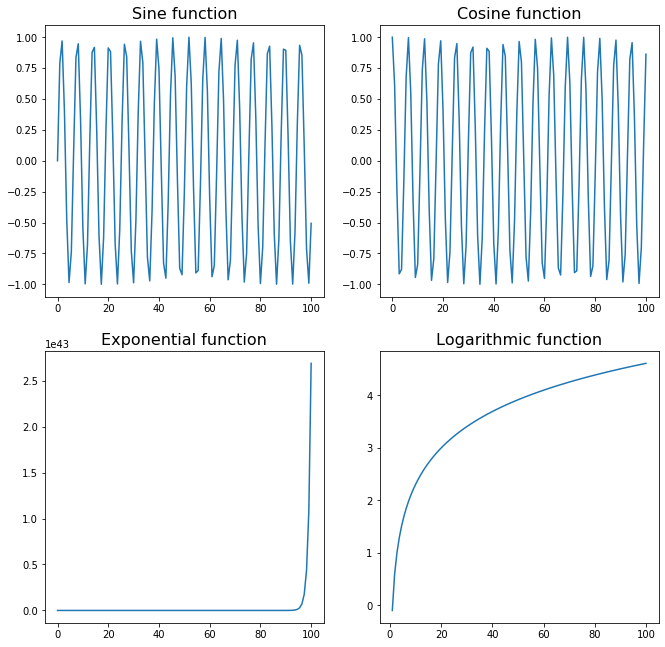

In [11]:
# X-axis linspace function 111 points from 0 to 100
x = np.linspace(0,100,111)
# Compute for mathematical functions - sine, cosine, exponential, and logarithmic functions
functions = [np.sin(x), np.cos(x), np.exp(x), np.log(x)]
titles = ['Sine function', 'Cosine function', 'Exponential function', 'Logarithmic function']

# Plot the functions
plt.figure(figsize=(11,11))
for index,function in enumerate(functions):
    plt.subplot(2, 2, index+1)
    plt.plot(x,function)
    plt.title(titles[index],fontsize=16)

`numpy.digitize` can be really useful working with continuous spaces in reinforcement learning. The `numpy.digitize(x, bins, right=False)` function has two arguments: (1) an input array `x`, and (2) an array of `bins`, returning the indices of the bins to which each value in input array belongs:

In [12]:
# Input array
x = np.array([0.5])

# Bins - 5 bins in total
bins = np.array([0,1,2,3])

# Digitize function - 0.5 belong to the bin 0<= 0.5 <1 - therefore returned index 1
np.digitize(x, bins)
# array([1], dtype=int64)

array([1], dtype=int64)

In [13]:
# The input array can contain several inputs
x = np.array([-0.5,1,3.5])

# Digitize function
np.digitize(x, bins)
# array([0, 2, 4], dtype=int64)

array([0, 2, 4], dtype=int64)

In the code above, we have 5 bins in total:
- x < 0 → Index 0
- 0≤ x < 1 → Index 1
- 1≤ x < 2 → Index 2
- 2≤ x < 3 → Index 3
- 3≤ x → Index 4

Therefore, if we provide as an input 0.5, the function returns 1, since that is the index of the bin to which 0.5 belongs.

Discretization allows us to apply algorithms designed for discrete spaces such as `Sarsa`, to continuous spaces.

In [15]:
def discretize(location, grid):
    return tuple(int(np.digitize(l, g)) for l, g in zip(location, grid))

# grid - bins - we will consider any value lower than 1 bin 0 and any value larger than 4 bin 4
grid = [np.array([1,2,3,4]),np.array([1,2,3,4])]

location =[2.5,1.2]
print(discretize(location,grid))
# (2, 1)

location =[4.5,0.2]
print(discretize(location,grid))
# (4, 0)

(2, 1)
(4, 0)


We can simulate a wide variety of **statistical distributions** by using **numpy** such as `normal`, `beta`, `binomial`, `uniform`, `gamma`, or `poisson` distributions. We will study these distributions when we start our lectures on statistics.

The `numpy.random.binomial(n, p, size=None)` draws samples from a **binomial distribution**. The binomial distribution is used when there are two mutually exclusive outcomes, providing the number of successes of n trials with a probability of success on a single trial p:

In [17]:
# number of successes (number of heads) in 10 coin flips
np.random.binomial(10, 0.5)
#3

4

In [18]:
# number of successes (number of heads) in 10 coin flips - biased coin with a 0.8 probability of
np.random.binomial(10,0.8)
#7

9

In [19]:
# we can obtain approximated probabilities by simulating a huge number of flips
# probability of obtaining 4 head in 10 flips
flips = np.random.binomial(10,0.5,size=int(1e6))
(flips==4).mean()
#0.2045

0.20469

The `numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)` function outputs a polynomial of degree deg that fits the points `(x,y)`, minimizing the square error.

This function can be very useful in linear regression problems. Linear regression models the relationship between a dependent variable and an independent variable, obtaining a line that best fits the data:

$$y = a + bx$$

where $x$ is the independent variable, $y$ is the dependent variable, $b$ is the **slope**, and $a$ is the **intercept**. To obtain both coefficients $a$ and $b$, we can use the `numpy.polyfit` function as follows:

In [42]:
import pandas as pd

# read csv file containing heights and weights
df = pd.read_csv('data/weight-height.csv')

# first 5 rows
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


As we can observe, both variables present a linear relation:

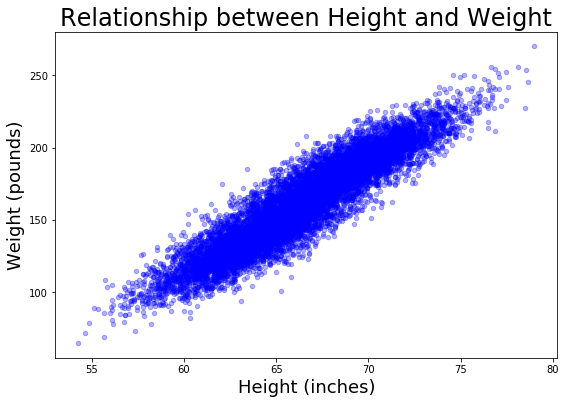

In [22]:
# relation between height and weight
df.plot(kind='scatter', x='Height',y='Weight', color='blue',alpha=0.3, figsize=(9,6))

# title, xlabel, and ylabel
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

We obtain the best-fit linear equation with the numpy.polyfit function in the following manner:

In [43]:
# Polynomial coefficients.
fit = np.polyfit(df.Height, df.Weight, 1)
fit

array([   7.71728764, -350.73719181])

The function returns the slope (7.72) and intercept (-350.74) of the linear model. Now, we can employ the obtained model (y=5.96x-224.50) to predict the weight of a man (unseen data). This prediction can be obtained by using the `numpy.polyval` function.

In [44]:
# Predict the weight - using the model weight=7.72*height - 350.74
np.polyval(fit, 70)

189.47294304284037

C:\Users\Dino\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Dino\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Dino\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


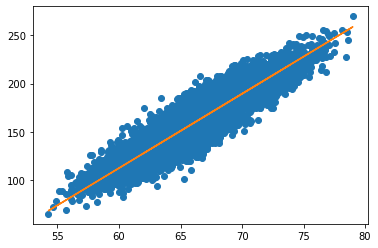

In [45]:
poly = np.poly1d(fit)

new_x = df.Height
new_y = poly(new_x)

x = df.Height
y = df.Weight
plt.plot(x, y, "o", new_x, new_y)

And what if the relationship is non-linear? Remember our `College` dataset from our R lecture? You asked me how did I knwo that there was a square relationship between two specific columns...

In [25]:
# read csv file containing heights and weights
df = pd.read_csv('data/college.csv')

# first 5 rows
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


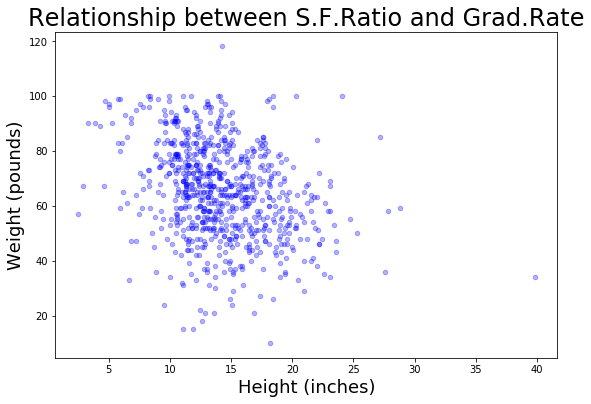

In [27]:
# relation between S.F.Ratio and Grad.Rate
df.plot(kind='scatter', x='S.F.Ratio',y='Grad.Rate', color='blue', alpha=0.3, figsize=(9,6))

# title, xlabel, and ylabel
plt.title('Relationship between S.F.Ratio and Grad.Rate', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [30]:
# Polynomial coefficients.
fit = np.polyfit(df['S.F.Ratio'], df['Grad.Rate'], 2)
fit

array([ 2.53469761e-02, -2.11206062e+00,  8.97931152e+01])

In [35]:
df['S.F.Ratio'].values[-1]

18.1

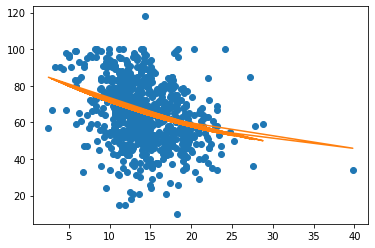

In [40]:
poly = np.poly1d(fit)

new_x = df['S.F.Ratio'].values
new_y = poly(new_x)

x = df['S.F.Ratio'].values
y = df['Grad.Rate'].values
plt.plot(x, y, "o", new_x, new_y)

The `numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)` computes the histogram of a set of data. 

The function returns 2 values: (1) the frequency count, and (2) the bin edges.

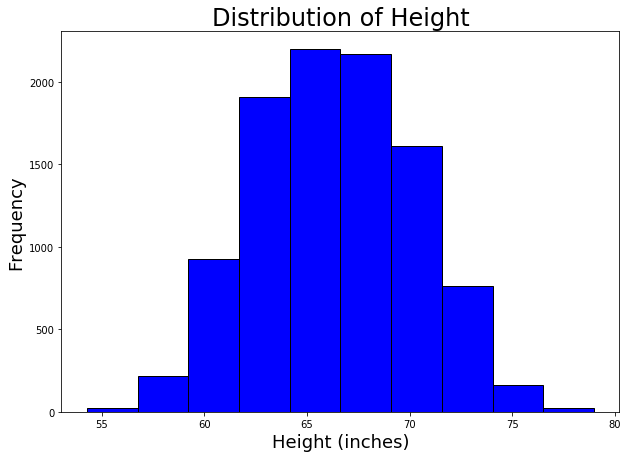

In [46]:
# read csv file containing heights and weights
df = pd.read_csv('data/weight-height.csv')

# data frame containing the height of 5000 men
df.Height.plot(kind='hist',color='blue',edgecolor='black',figsize=(10,7))

# title, xlabel, and ylabel.
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

By default, the histogram method breaks up the data set into 10 bins. Notice that the xaxis labels do not match with the bin size. This can be fixed by passing in a `xticks` parameter, containing the list of the bin sizes, in the following manner:

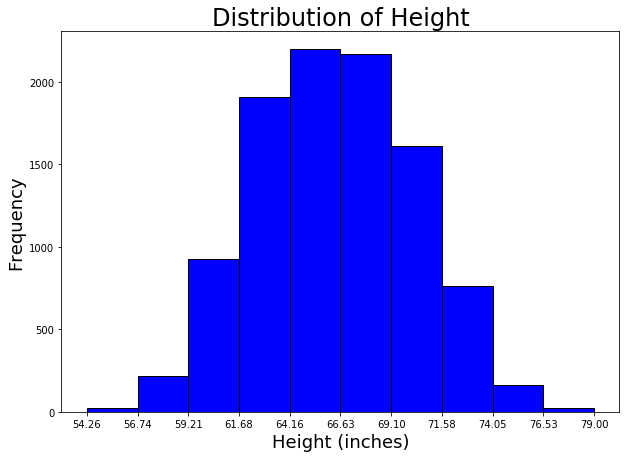

In [47]:
#'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df.Height)

#xticks keyword with bin edges
df.Height.plot(kind='hist',color='blue',edgecolor='black',xticks=bin_edges ,figsize=(10,7))

#title, xlabel, and ylabel.
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

The histogram is the single most important graph in data science. Wew'll talk a lot more about this.

# 3. The theory

So why does NumPy make Python run so fast?

## Origins
Jupyter originates from **IPython**, an effort to make Python development more interactive. Since its inception, the scope of the project has expanded to include **Ju**lia, **Pyt***hon, and **R**, so the name was changed to **Jupyter** as a reference to these core languages. 

A common question: *Is Python interpreted or compiled*?

In the simple model of the world, **compile** means to convert a program in a high-level language into a **binary executable** full of machine code (CPU instructions) fit for the CPU on your laptop. When you compile a C program, this is what happens. The result is a file that your operating system can run for you.

In the simple definition of **interpreted**, the source code is *not* directly run by the target machine. There is another program called the ***interpreter*** that reads and executes the source code directly. The interpreter, which is specific to the target machine, translates each statement of the source code into machine code and runs it. "*Interpreted*" is the way most command shells operate: Try running `ls` in a command shell.

But the real world is not so limited. Making real programming languages useful and powerful involves a wider range of possibilities about how they work. Compiling is a more general idea: take a program in one language (or form), and convert it into another, usually more lover-level, language or form. If you compile to the same level, as you would if you for example compiled javascript into java, then you usually use the word **transpiler**. 

In Python, the source code is indeed compiled into a much simpler form called **bytecode**, just like java and C#. Bytecode are instructions similar in spirit to CPU instructions, but instead of being executed by the CPU, they are executed by software called a **virtual machine** or a **runtime**. Note that these *are not* VM’s that emulate entire operating systems, just a simplified CPU execution environment.

>**Note**: Thank god for bytecode because there are many different types of CPU architectures, and if we had to compile our code down to machine code every time, we would need different compilers for each CPU architecture on our laptop, and that would get very complicated very fast!

In Python 2, the bytecode is stored in a .pyc file. In Python 3, the bytecode files are stored in a folder named __pycache__. This folder is automatically created when you try to import another file that you created.

>**Note**: We can also use the `compile()` function to compile a string that contains the Python source code. The syntax of this function is: `compile(source, filename, mode, flag, dont_inherit, optimize)`

> We only focus on the first three arguments which are required (the others are optional). `source` is the source code to compile which can be a String, a Bytes object, or an AST object. `filename` is the name of the file that the source code comes from. If the source code does not come from a file, you can write whatever you like or leave an empty string. `mode` can be:
`exec`: accepts Python source code in any form (any number of statements or blocks). It compiles them into a bytecode that finally returns None
`eval` : accepts a single expression and compiles it into a bytecode that finally returns the value of that expression
`single`: only accepts a single statement (or multiple statements separated by ;). If the last statement is an expression, then the resulting bytecode prints the repr() of the value of that expression to the standard output.

An important aspect of Python’s compilation to bytecode is that it’s entirely **implicit**. You never invoke a compiler, you simply run a .py file. The Python implementation compiles the files as needed. This is different than Java and C#, for example, where you have to run the Java (`javac`) or C# (`cc`) compiler to turn Java or C# source code into compiled class files. For this reason, Java and C# are often called **compiled languages**, while Python is called an **interpreted language**. ***But both compile to bytecode, and then both execute the bytecode with a software implementation of a virtual machine***!

Another important Python feature is its interactive prompt. You can type Python statements and have them immediately executed. This interactivity is usually missing in "*compiled*” languages, but even at the Python interactive prompt, your Python ***is compiled to bytecode***, and then ***the bytecode is executed***. This immediate execution, and Python’s lack of an explicit compile step, are why people call the Python executable “**the Python interpreter**”.

And even this is a simplified description of how these languages can work! “*Compiled*” languages like Java and C# can have interactive prompts, but they are not at the center of those worlds in the same way that Python’s is. Java originally always compiles to bytecode, but then it pioneered **just-in-time** (JIT) (a.k.a. **ahead-of-time**) techniques for compiling directly to machine code at runtime, and now Java is sometimes compiled entirely to machine code, in the C style.

This shows just how flimsy the words “**interpreted**” and “**compiled**” can be. Like most adjectives applied to programming languages, they are thrown around as if they were black-and-white distinctions, but the reality is much subtler and complex.

Finally, how your program gets executed isn’t a characteristic of the language at all: it’s about the language implementation. I’ve been talking here about Python, but this has really been a description of **CPython**, the usual implementation of Python, so-named because it is written in C. **PyPy** is another implementation, using a JIT compiler to run code even faster than CPython can.

Python has multiple implementations. They are mostly based on bytecode interpretation and bytecode-to-machine-code JIT compilation. Python, by default, compiles the source code to bytecode in memory on first run and dumps the bytecode to \*.pyc files. On second run, it loads the bytecode from disk. Then it interprets the bytecode in memory. So Python also, typically, has a compilation phase, it's just not as visible

So: is Python compiled? *Yes*, typically to bytecode. Is Python interpreted? *Yes*, because it has a runtime. Sorry, the world is complicated.

Jupyter Notebook python is a browser bases REPL (read eval print loop) built on **IPython** (and other open-source libraries). It allows us to run *interactive python code* on the browser.

But Jupyter Notebook cells can also be used to compile and run code from different languages using IPython magic commands. Use IPython Magics with the name of your kernel at the start of each cell that you want to use that cell for:
- %%bash
- %%HTML
- %%python2
- %%python3
- %%ruby
- %%perl

## Marshaling
So, back to Numpy...

NumPy makes code run faster because NumPy is compiled to machine code! And that is why we have some of the constraints we mentioned, such as not being able to mix types in containers.

Moreover, because Python is a dynamically typed language, this slows down exectuion, and most of the bugs are discovered during run-time. So, slow Python interpreter and fast NumPy library make a marriage in heaven!

So, what we do is write our performance-sensitive functions in another language (e.g., C or C++) and leverage specific bindings to call these functions from Python. This is something many numerical libraries (e.g., NumPy, SciPy, etc.) or deep learning frameworks (e.g., TensorFlow, PyTorch, etc.) do in Python. So, if you are a Data Scientist or a Machine Learning engineer wanting to call CUDA functions, this paragraph is for you!

To move data from Python to C or C++, the Python bindings have to transform it into a form suitable for transmission.
In Python, everything is an **object** (under the hood). How many bytes of memory an integer uses depends on the version of Python you have installed and your operating system, among other factors. On the other hand, a `uint8_t` integer in C always uses 8 bits of total memory. Thus, we have to reconcile these two types somehow.

**Marshalling** is something that the Python bindings take care of for us, but we may need to intervene in some cases. 

C and Python manage memory differently. In Python, when you declare an object, Python automatically allocates memory for it. When you don’t need that object, Python has a garbage collector that can destroy unused or unreferenced objects, releasing the memory back to the system.

In C, things are entirely different. It’s ***you***, the programmer, who must allocate the memory space to create an object, and then it’s ***you*** again the one who has to release that memory back to the system. We should take this into account and release any memory we don’t need anymore on the same side of the language barrier.

And to put it simply, NumPy takes care of all this for us! How? Here's an example

## A Simple Example

What we’ll need:
- Python 3.6 or greater
- The Python development tools (e.g., the python3-dev package)
- C source code

To keep things simple, we will create and build a C library that adds two numbers together.

```
#include <stdio.h>


float cadd(int x, float y) {
    float res = x + y;
    printf("In cadd: int %d float %.1f returning  %.1f\n", x, y, res);
    return res;
}
```

Next, we need to compile the source code and build a shared library. To this end, we execute on a Mac:
```
gcc -shared -Wl,-soname,libcadd -o libcadd.so -fPIC cadd.c
```

This command should produce a `libcadd.so` file in our working directory.

`ctypes` is a tool in the Python standard library that creates **Python bindings**. 

Being part of the Python standard library makes it ideal as you we not need to install anything.

To execute the C `cadd` function from a Python script, copy the source code below:
```
import ctypes
import pathlib

if __name__ == "__main__":
    # load the lib
    libname = pathlib.Path().absolute() + "libcadd.so"
    c_lib = ctypes.CDLL(libname)
    
    x, y = 6, 2.3

    # define the return type
    c_lib.cadd.restype = ctypes.c_float
    
    # call the function with the correct argument types
    res = c_lib.cadd(x, ctypes.c_float(y))
    
    print(f"In Python: int: {x} float {y:.1f} return val {res:.1f}")
```

In line 7 (`c_lib = ctypes.CDLL(libname)`), we create a handle to the C shared library we built before. In line 12 (`c_lib.cadd.restype = ctypes.c_float`), we declare the return type of the C `cadd` function. This is crucial; we need to let ctypes know how to **marshal** objects to pass them around and what types to expect to **unmarshal** them correctly.

This is the case also for the y variable in line 15. We need to declare that this is of type `float`. 

Finally, we can leave x as it is because, by default, ctypes thinks that everything’s an integer.

We can execute this script just like any other Python script:
```
python3 padd.py
```

The result:
- In cadd: int 6 float 2.3 returning  8.3
- In Python: int: 6 float 2.3 return val 8.3

And that is how we call a C library function from Python. And that is what NumPy does!